# Vaccination programs

## Imports

In [3]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sps
from datetime import timedelta, date, datetime

from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import warnings

warnings.filterwarnings("ignore")

## Data

In [29]:
# The dataframe is available on
# https://github.com/owid/covid-19-data
# https://www.kaggle.com/gpreda/covid-world-vaccination-progress
# The original dataframe contains 104214 observations of 16 parameters.
# For this project only 8 parameters were subsetted and used

In [38]:
# Download data from Github
data_table = pd.read_csv(
    "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"
)

In [39]:
data_table = data_table[
    [
        "location",
        "date",
        "total_vaccinations",
        "people_vaccinated",
        "people_fully_vaccinated",
        "total_vaccinations_per_hundred",
        "people_vaccinated_per_hundred",
        "people_fully_vaccinated_per_hundred",
    ]
].rename(columns={"location": "country"})

In [42]:
data_table.head(1)

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
0,Afghanistan,2021-02-22,0.0,0.0,NaN,0.0,0.0,NaN


## Exploratory Data Analysis

The dataframe describes vaccination rates in 235 countries across the world.  
The vaccinations began in the end of 2020.  
Vaccination programs still exist at autumn of 2021. 

### Statistical data description

In [43]:
data_table.describe().round()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
count,8.541700e+04,8.113200e+04,7.806100e+04,85417.0,81132.0,78061.0
mean,5.616980e+08,2.487064e+08,2.286639e+08,124.0,54.0,49.0
std,1.842160e+09,8.006461e+08,7.403763e+08,85.0,29.0,29.0
min,0.000000e+00,0.000000e+00,1.000000e+00,0.0,0.0,0.0
25%,1.970788e+06,1.050009e+06,9.644000e+05,45.0,28.0,21.0
50%,1.439435e+07,6.901088e+06,6.191345e+06,131.0,64.0,58.0
75%,1.161972e+08,5.093295e+07,4.773185e+07,195.0,78.0,74.0
max,1.357877e+10,5.631264e+09,5.177943e+09,410.0,129.0,127.0


In [ ]:
# the number of vaccinations could be larger than the population size since many vaccines require two shots.
# Moreover, many people traveled aboad to recieve a better or additional vaccine

In [93]:
# List of all countries and continents
countries = data_table.country.unique().tolist()
len(countries)

235

In [46]:
data_table.isnull().sum()

country                                     0
date                                        0
total_vaccinations                     110829
people_vaccinated                      115114
people_fully_vaccinated                118185
total_vaccinations_per_hundred         110829
people_vaccinated_per_hundred          115114
people_fully_vaccinated_per_hundred    118185
dtype: int64

### Filling missing values

It is unlikely that vaccination rates can drasticaly change between two points of data entry.  
Therefore, it seems logical to fill missing values with linear interpolation.

In [48]:
# Filling missing values with data using linear approximation

for country in countries:
    data_table.loc[data_table["country"] == country] = data_table.loc[
        data_table["country"] == country
    ].interpolate(method="linear")

In [50]:
data_table.isna().sum()

country                                    0
date                                       0
total_vaccinations                        31
people_vaccinated                        787
people_fully_vaccinated                12293
total_vaccinations_per_hundred            31
people_vaccinated_per_hundred            787
people_fully_vaccinated_per_hundred    12293
dtype: int64

### Filtering

In [51]:
# from countries with sparse data

### Data visualisation

In [54]:
data_table.dtypes

country                                 object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
dtype: object

Europe, Asia, and North America were the first countries to develop vaccines against COVID-19 and deploy a full-scale vaccination program.  
Other continents, like Africa, South America, and Australia lagged behind in vaccination rates,  
since they did not have neither developed pharm industry nor enough resources, and they had to wait for vaccine supplies from developed countries. 

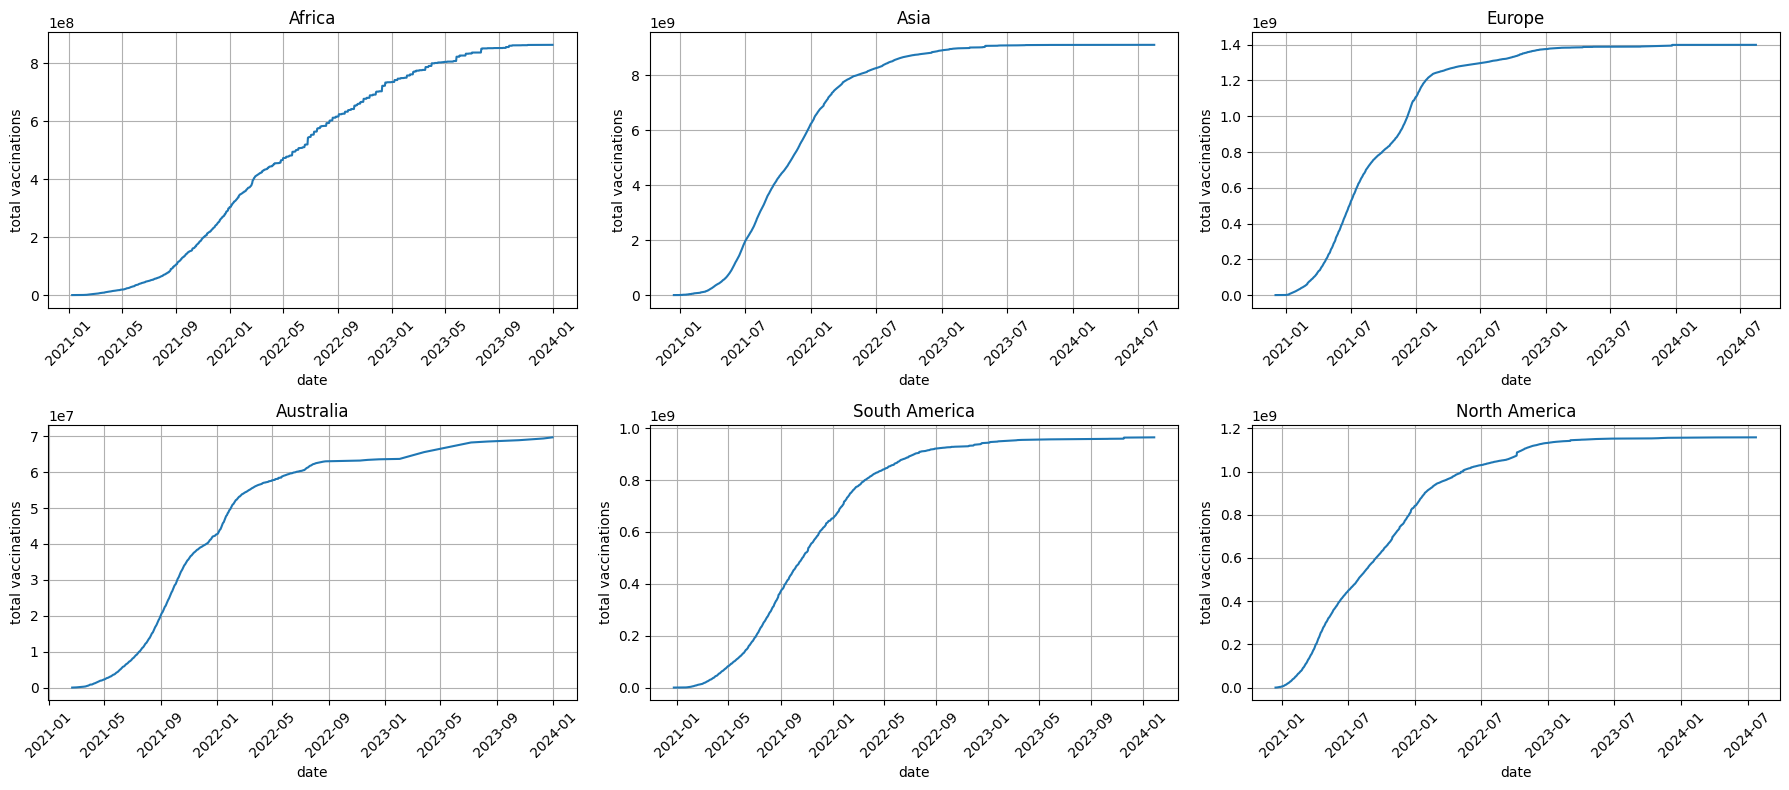

In [75]:
# absolute vaccinations rates across six continents

continents = ["Africa", "Asia", "Europe", "Australia", "South America", "North America"]
fig, ax = plt.subplots(2, 3, figsize=(18, 8))

for i, continent in enumerate(continents):
    j = i % 3
    i = i // 3

    sample = data_table[data_table["country"] == continent]
    ax[i, j].plot(
        pd.to_datetime(sample["date"]),
        sample["total_vaccinations"],
    )
    ax[i, j].grid()
    ax[i, j].set_title(continent)
    ax[i, j].set_xlabel("date")
    ax[i, j].tick_params(axis="x", labelrotation=45)
    ax[i, j].set_ylabel("total vaccinations")

fig.tight_layout()
plt.show()

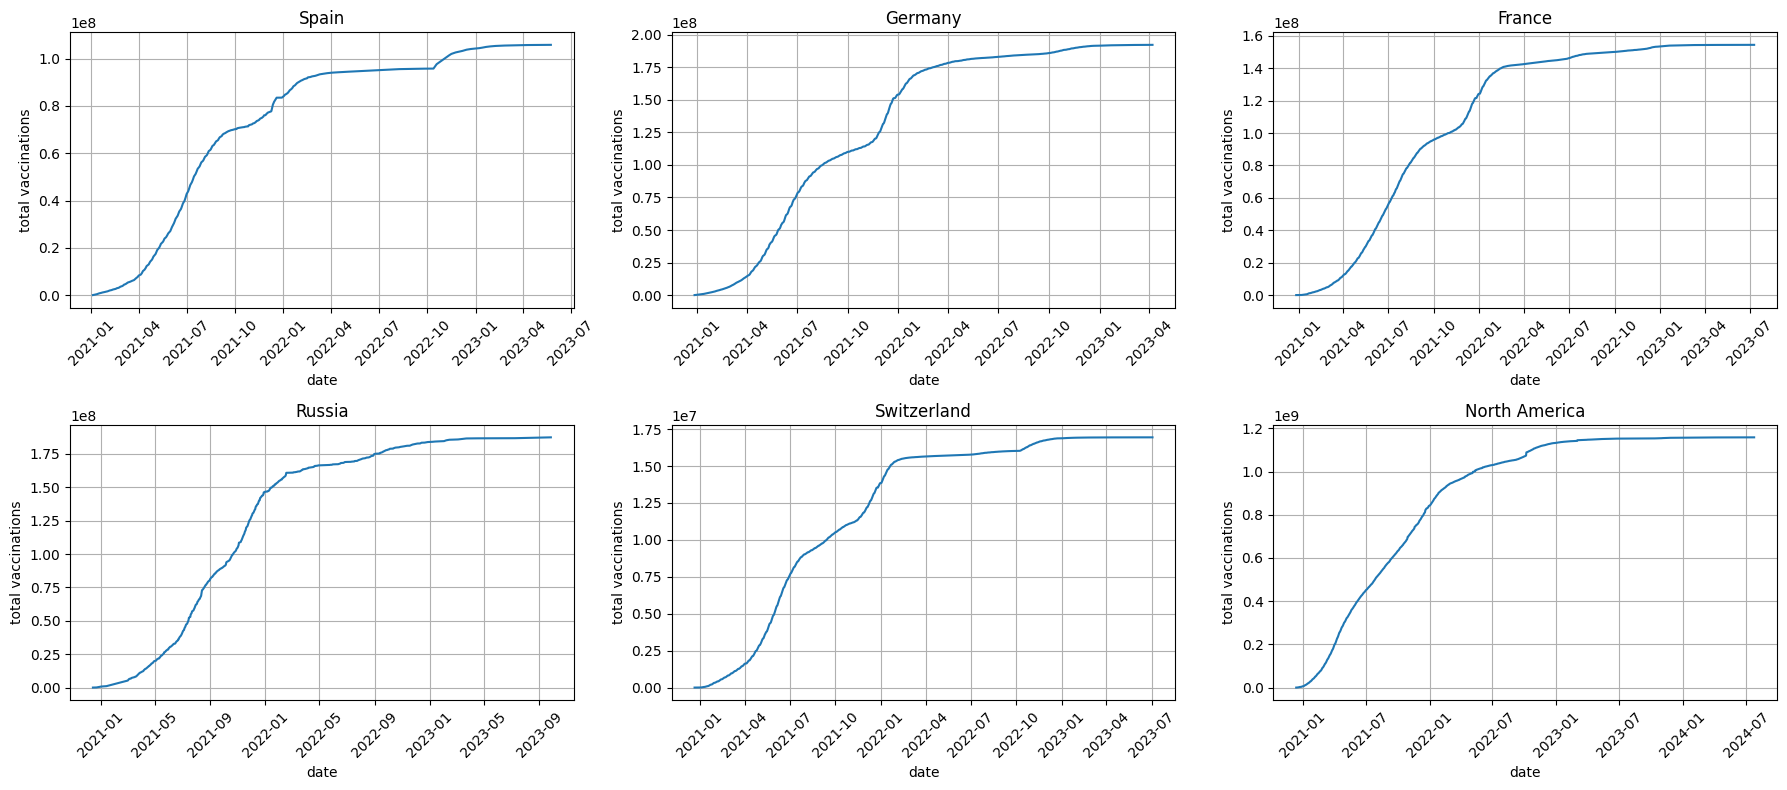

In [92]:
# absolute vaccinations rates across six sample_countries

sample_countries = [
    "Spain",
    "Germany",
    "France",
    "Russia",
    "Switzerland",
    "North America",
]
fig, ax = plt.subplots(2, 3, figsize=(18, 8))

for i, continent in enumerate(sample_countries):
    j = i % 3
    i = i // 3

    sample = data_table[data_table["country"] == continent]
    ax[i, j].plot(
        pd.to_datetime(sample["date"]),
        sample["total_vaccinations"],
    )
    ax[i, j].grid()
    ax[i, j].set_title(continent)
    ax[i, j].set_xlabel("date")
    ax[i, j].tick_params(axis="x", labelrotation=45)
    ax[i, j].set_ylabel("total vaccinations")

fig.tight_layout()
plt.show()

It is evident that despite the fact that vaccinations began in the end of 2020 many countries started vaccinations programs much later.  
At that time only developed asian, european and north american countries could financially and logisticaly afford to begin vaccinations.  
Less developed countries started to receive vaccines later in the spring of 2021.  


## Forecasting

The sigmoid-curve was used



$ f(x) = \frac L {1+{e}^{-k * (x-x_0)}} \ $

The fitted curves had $  R^2 > 0.9$  for 199 countries.  
The example of vaccination rates in Ireland proves that this function perfectly describes the data.  
The countries that had sparse data were not analyzed in the following work.  

In [94]:
# define sigmoidal curve
def func(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))


# define reverse sigmoidal curve
def func_predict(y, L, k, x0):
    return -np.log(L / y - 1) / k + x0


predictions = []
r2 = []

# iteratively fit sigmoidal curve to each country;
# calculate predictions and r2-value
for country in countries:
    subset = data_table[data_table["country"] == country].dropna()
    if y.shape[0] < 10:
        continue
    x = list(range(subset.shape[0]))
    y = subset.people_fully_vaccinated_per_hundred
    if country == "Tokelau":
        r2.append(0)
        predictions.append(0)
        continue
    try:
        popt, pcov = curve_fit(func, x, y)
    except RuntimeError:
        r2.append(0)
        predictions.append(0)
        continue
    r2.append(r2_score(y, func(x, *popt).round(3)))
    try:
        date = datetime.strptime((np.array(subset.date)[0]), "%Y-%m-%d") + timedelta(
            days=func_predict(75, *popt).round(0)
        )
        predictions.append(date.strftime("%d %b %Y"))
    except ValueError:
        predictions.append(0)

r2 = np.round(np.array(r2), 3)
countries = pd.DataFrame(data=countries, columns=["country"])
r2 = pd.DataFrame(data=r2, columns=["R2"])
predictions = pd.DataFrame(data=predictions, columns=["prediction"])

# concatenate countries, r2, and predictions into one dataframe;
# subset dataframe to get values with r2 > 0.9
result = pd.concat([countries, r2, predictions], axis=1)
result = result[result.R2 > 0.1].dropna()[result.prediction != 0]

In [ ]:
# plot example of ireland and fitted curve
subset = data_table[data_table["country"] == "Ireland"].dropna()
x = list(range(subset.shape[0]))
y = subset.Fully_Vaccinated_Ratio

popt, pcov = curve_fit(func, x, y)


fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=data_table[data_table["country"] == "Ireland"].date,
        y=data_table[
            data_table["country"] == "Ireland"
        ].people_fully_vaccinated_per_hundred,
        name="Real data",
    )
)

fig.add_trace(go.Scatter(x=subset.date, y=func(x, *popt), name="Regression"))

fig.update_layout(
    font_family="'Nunito', sans-serif",
    title={
        "text": f"Vaccination rates in Ireland",
        "y": 0.95,
        "x": 0.5,
        "xanchor": "center",
        "yanchor": "top",
    },
    height=400,
    margin=dict(l=40, r=20, t=50, b=60),
    xaxis_title="date",
    yaxis_title="Vaccinations",
    showlegend=True,
    legend={},
)

# add anotation with r2
fig.add_annotation(
    dict(
        x=1.1,
        y=1.1,
        showarrow=False,
        text="$R^2 = 0.999$",
        textangle=0,
        xanchor="right",
        xref="paper",
        yref="paper",
    )
)

fig.show()

After the data was fitted with non-linear regression, it is interesting to get information about the date, when vaccination programs can be closed.  
To do that, it is necessary to determine the threshold, after which, the vaccinations can be stopped.  
The threshold, in a given population, is the point where the disease reaches a steady state, which means that the infection level is neither growing nor declining exponentially.  
The threshold is evaluated using the formula below.

$ p_c = 1 - \frac 1 R_0\ $

 
where $ R_0 - $  the basic reproduction number, the average number of new infections caused by each case in a population where each individual is equally likely to come into contact with any other susceptible individual in the population;  
$ P_c - $  the critical proportion of the population needed to be immune to stop the transmission of disease, which is the same as the "herd immunity threshold" (HIT).  
Information about herd immunity thresholds was found <a href="https://en.wikipedia.org/wiki/Herd_immunity#Theoretical_basis">here</a>.

Values of $ R_0$  and herd immunity thresholds (HITs) of well-known infectious diseases prior to intervention
<center>

<style type="text/css">
.tg  {border:none;border-collapse:collapse;border-color:#ccc;border-spacing:0;}
.tg td{background-color:#fff;border-color:#ccc;border-style:solid;border-width:0px;color:#333;
  font-family:Nunito, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:0px;color:#333;
  font-family:Nunito, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-9myl{font-family:Nunito, sans-serif !important;font-size:100%;text-align:left;text-decoration:underline;
  vertical-align:top}
.tg .tg-dgtn{font-family:Nunito, sans-serif !important;font-size:100%;font-style:italic;font-weight:bold;
  text-align:center;vertical-align:top}
.tg .tg-ss8n{font-family:Nunito, sans-serif !important;font-size:100%;text-align:left;vertical-align:top}
.tg .tg-7m2y{background-color:#f9f9f9;font-family:Nunito, sans-serif !important;font-size:100%;text-align:center;
  vertical-align:top}
.tg .tg-afns{background-color:#f9f9f9;font-family:Nunito, sans-serif !important;font-size:100%;text-align:left;
  vertical-align:middle}
.tg .tg-uq8q{font-family:Nunito, sans-serif !important;font-size:100%;font-weight:bold;text-align:center;
  vertical-align:top}
.tg .tg-09c9{font-family:Nunito, sans-serif !important;font-size:100%;text-align:left;vertical-align:middle}
.tg .tg-ifcf{background-color:#f9f9f9;font-family:Nunito, sans-serif !important;font-size:100%;font-style:italic;
  text-align:left;text-decoration:underline;vertical-align:top}
.tg .tg-9bu0{background-color:#f9f9f9;font-family:Nunito, sans-serif !important;font-size:100%;text-align:left;
  vertical-align:top}
.tg .tg-mqzu{background-color:#f9f9f9;font-family:Nunito, sans-serif !important;font-size:100%;text-align:center;
  vertical-align:middle}
.tg .tg-kpux{font-family:Nunito, sans-serif !important;font-size:100%;text-align:center;vertical-align:middle}
.tg .tg-f8ma{background-color:#f9f9f9;font-family:Nunito, sans-serif !important;font-size:100%;text-align:left;
  text-decoration:underline;vertical-align:top}
.tg .tg-r28n{font-family:Nunito, sans-serif !important;font-size:100%;text-align:center;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-uq8q">Disease</th>
    <th class="tg-uq8q"><span style="font-weight:bold">Transmission</span></th>
    <th class="tg-uq8q">\(R_0\)</th>
    <th class="tg-uq8q">HIT, %</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-9myl"><a href="https://en.wikipedia.org/wiki/Measles" target="_blank" rel="noopener noreferrer"><span style="text-decoration:none">Measles</span></a></td>
    <td class="tg-9bu0">Aerosol</td>
    <td class="tg-mqzu">12-18</td>
    <td class="tg-mqzu">92-94</td>
  </tr>
  <tr>
    <td class="tg-9myl"><a href="https://en.wikipedia.org/wiki/Chickenpox" target="_blank" rel="noopener noreferrer"><span style="text-decoration:none">Chickenpox</span></a> (varicella)</td>
    <td class="tg-09c9">Aerosol</td>
    <td class="tg-kpux">10-12</td>
    <td class="tg-kpux">90-92</td>
  </tr>
  <tr>
    <td class="tg-f8ma"><a href="https://en.wikipedia.org/wiki/Mumps" target="_blank" rel="noopener noreferrer"><span style="text-decoration:none">Mumps</span></a></td>
    <td class="tg-9bu0">Respiratory droplets</td>
    <td class="tg-mqzu">10-12</td>
    <td class="tg-mqzu">90-92</td>
  </tr>
  <tr>
    <td class="tg-9myl"><a href="https://en.wikipedia.org/wiki/COVID-19" target="_blank" rel="noopener noreferrer"><span style="text-decoration:none">COVID-19</span></a> <span style="text-decoration:underline">(</span><a href="https://en.wikipedia.org/wiki/Investigations_into_the_origin_of_COVID-19" target="_blank" rel="noopener noreferrer"><span style="text-decoration:none">ancestral strain</span></a><span style="text-decoration:underline">)</span></td>
    <td class="tg-ss8n">Respiratory droplets and aerosol</td>
    <td class="tg-r28n">2.4-3.4</td>
    <td class="tg-r28n">58-71</td>
  </tr>
  <tr>
    <td class="tg-f8ma"><a href="https://en.wikipedia.org/wiki/COVID-19" target="_blank" rel="noopener noreferrer"><span style="text-decoration:none">COVID-19</span></a> <span style="text-decoration:underline">(</span><a href="https://en.wikipedia.org/wiki/SARS-CoV-2_Alpha_variant" target="_blank" rel="noopener noreferrer"><span style="text-decoration:none">Alpha variant</span></a><span style="text-decoration:underline">)</span></td>
    <td class="tg-9bu0">Respiratory droplets and aerosol</td>
    <td class="tg-7m2y">4-5</td>
    <td class="tg-7m2y">75-80</td>
  </tr>
  <tr>
    <td class="tg-9myl"><a href="https://en.wikipedia.org/wiki/COVID-19" target="_blank" rel="noopener noreferrer"><span style="text-decoration:none">COVID-19</span></a> <span style="text-decoration:underline">(</span><a href="https://en.wikipedia.org/wiki/SARS-CoV-2_Delta_variant" target="_blank" rel="noopener noreferrer"><span style="text-decoration:none">Delta variant</span></a><span style="text-decoration:underline">)</span></td>
    <td class="tg-ss8n">Respiratory droplets and aerosol</td>
    <td class="tg-r28n">5.1</td>
    <td class="tg-r28n">80</td>
  </tr>
  <tr>
    <td class="tg-f8ma"><a href="https://en.wikipedia.org/wiki/COVID-19" target="_blank" rel="noopener noreferrer"><span style="text-decoration:none">COVID-19</span></a> (<a href="https://en.wikipedia.org/wiki/SARS-CoV-2_Omicron_variant" target="_blank" rel="noopener noreferrer"><span style="text-decoration:none">Omicron variant</span></a>)</td>
    <td class="tg-afns">Respiratory droplets and aerosol</td>
    <td class="tg-mqzu">9.5</td>
    <td class="tg-mqzu">89</td>
  </tr>
  <tr>
    <td class="tg-9myl"><a href="https://en.wikipedia.org/wiki/Rubella" target="_blank" rel="noopener noreferrer"><span style="text-decoration:none">Rubella</span></a></td>
    <td class="tg-09c9">Respiratory droplets</td>
    <td class="tg-kpux">6-7</td>
    <td class="tg-kpux">83-86</td>
  </tr>
  <tr>
    <td class="tg-f8ma"><a href="https://en.wikipedia.org/wiki/Polio" target="_blank" rel="noopener noreferrer"><span style="text-decoration:none">Polio</span></a></td>
    <td class="tg-9bu0">Fecal-oral route</td>
    <td class="tg-mqzu">5-7</td>
    <td class="tg-mqzu">80-86</td>
  </tr>
  <tr>
    <td class="tg-9myl"><a href="https://en.wikipedia.org/wiki/Whooping_cough" target="_blank" rel="noopener noreferrer"><span style="text-decoration:none">Pertussis</span></a></td>
    <td class="tg-09c9">Respiratory droplets</td>
    <td class="tg-kpux">5.5</td>
    <td class="tg-kpux">82</td>
  </tr>
  <tr>
    <td class="tg-f8ma"><a href="https://en.wikipedia.org/wiki/Smallpox" target="_blank" rel="noopener noreferrer"><span style="text-decoration:none">Smallpox</span></a></td>
    <td class="tg-afns">Respiratory droplets</td>
    <td class="tg-mqzu">3.5-6.0</td>
    <td class="tg-mqzu">71-83</td>
  </tr>
  <tr>
    <td class="tg-9myl"><a href="https://en.wikipedia.org/wiki/HIV/AIDS" target="_blank" rel="noopener noreferrer"><span style="text-decoration:none">HIV/AIDS</span></a></td>
    <td class="tg-ss8n">Body fluids</td>
    <td class="tg-kpux">2-5</td>
    <td class="tg-kpux">50-80</td>
  </tr>
  <tr>
    <td class="tg-f8ma"><a href="https://en.wikipedia.org/wiki/Severe_acute_respiratory_syndrome" target="_blank" rel="noopener noreferrer"><span style="text-decoration:none">SARS</span></a></td>
    <td class="tg-afns">Respiratory droplets</td>
    <td class="tg-mqzu">2-4</td>
    <td class="tg-mqzu">50-75</td>
  </tr>
  <tr>
    <td class="tg-9myl"><a href="https://en.wikipedia.org/wiki/Diphtheria" target="_blank" rel="noopener noreferrer"><span style="text-decoration:none">Diphtheria</span></a></td>
    <td class="tg-ss8n">Saliva</td>
    <td class="tg-r28n">1.7-4.3</td>
    <td class="tg-r28n">41-77</td>
  </tr>
  <tr>
    <td class="tg-f8ma"><a href="https://en.wikipedia.org/wiki/Common_cold" target="_blank" rel="noopener noreferrer"><span style="text-decoration:none">Common cold</span></a></td>
    <td class="tg-afns">Respiratory droplets</td>
    <td class="tg-mqzu">2-3</td>
    <td class="tg-mqzu">50-67</td>
  </tr>
  <tr>
    <td class="tg-9myl"><a href="https://en.wikipedia.org/wiki/Monkeypox" target="_blank" rel="noopener noreferrer"><span style="text-decoration:none">Monkeypox</span></a></td>
    <td class="tg-09c9">Physical contact, body fluids, respiratory droplets</td>
    <td class="tg-r28n">1.5-2.7</td>
    <td class="tg-r28n">31-63</td>
  </tr>
  <tr>
    <td class="tg-f8ma"><a href="https://en.wikipedia.org/wiki/Influenza" target="_blank" rel="noopener noreferrer"><span style="text-decoration:none">Influenza</span></a> (<a href="https://en.wikipedia.org/wiki/Spanish_flu" target="_blank" rel="noopener noreferrer"><span style="text-decoration:none">1918 pandemic strain</span></a>)</td>
    <td class="tg-afns">Respiratory droplets</td>
    <td class="tg-mqzu">2</td>
    <td class="tg-mqzu">50</td>
  </tr>
  <tr>
    <td class="tg-9myl"><a href="https://en.wikipedia.org/wiki/Ebola" target="_blank" rel="noopener noreferrer"><span style="text-decoration:none">Ebola</span></a> (<a href="https://en.wikipedia.org/wiki/2014_Ebola_outbreak" target="_blank" rel="noopener noreferrer"><span style="text-decoration:none">2014 outbreak</span></a>)</td>
    <td class="tg-09c9">Body fluids</td>
    <td class="tg-r28n">1.4-1.8</td>
    <td class="tg-r28n">31-44</td>
  </tr>
  <tr>
    <td class="tg-f8ma"><a href="https://en.wikipedia.org/wiki/Influenza" target="_blank" rel="noopener noreferrer"><span style="text-decoration:none">Influenza</span></a> (<a href="https://en.wikipedia.org/wiki/2009_swine_flu_pandemic" target="_blank" rel="noopener noreferrer"><span style="text-decoration:none">2009 pandemic</span></a> <a href="https://en.wikipedia.org/wiki/Pandemic_H1N1/09_virus" target="_blank" rel="noopener noreferrer"><span style="text-decoration:none">strain</span></a>)</td>
    <td class="tg-afns">Respiratory droplets</td>
    <td class="tg-7m2y">1.3-2.0</td>
    <td class="tg-7m2y">25-51</td>
  </tr>
  <tr>
    <td class="tg-9myl"><a href="https://en.wikipedia.org/wiki/Influenza" target="_blank" rel="noopener noreferrer"><span style="text-decoration:none">Influenza</span></a> (seasonal strains)</td>
    <td class="tg-09c9">Respiratory droplets</td>
    <td class="tg-r28n">1.2-1.4</td>
    <td class="tg-r28n">17-29</td>
  </tr>
  <tr>
    <td class="tg-f8ma"><a href="https://en.wikipedia.org/wiki/Andes_orthohantavirus" target="_blank" rel="noopener noreferrer"><span style="text-decoration:none">Andes hantavirus</span></a></td>
    <td class="tg-afns">Respiratory droplets and body fluids</td>
    <td class="tg-7m2y">0.8-1.6</td>
    <td class="tg-7m2y">0-36</td>
  </tr>
  <tr>
    <td class="tg-9myl"><a href="https://en.wikipedia.org/wiki/Nipah_virus" target="_blank" rel="noopener noreferrer"><span style="text-decoration:none">Nipah virus</span></a></td>
    <td class="tg-09c9">Body fluids</td>
    <td class="tg-kpux">0.5</td>
    <td class="tg-kpux">0</td>
  </tr>
  <tr>
    <td class="tg-f8ma"><a href="https://en.wikipedia.org/wiki/MERS" target="_blank" rel="noopener noreferrer"><span style="text-decoration:none">MERS</span></a></td>
    <td class="tg-afns">Respiratory droplets</td>
    <td class="tg-7m2y">0.3-0.8</td>
    <td class="tg-mqzu">0</td>
  </tr>
</tbody>
</table>
</center>

For this project, the lowest threshold of 75% for the alpha variant of COVID-19 was calculated.  
Using logistic regression, the dates when immunizations reach the threshold were found (shown below).  
It is important to underline that out of 199 curves $R^2 > 0.9$ that described vaccination rates in 199 countries only 38 countries reached or will reach in nearest future the threshold of herd immunity.  
 
However, it is important to point out that a lot of people could get immunity from COVID-19 after having had the disease.  
That could have lead to lower percentage of the population needed for reaching herd immunity threshold.  
Unfortunately, in this project this factor was not taken into account.
 

In [ ]:
# # the code is represented in the table below
# result

<center><p>Predicted dates of the end of vaccinations</p> 
<style type="text/css">
.tg  {border:none;border-collapse:collapse;border-color:#ccc;border-spacing:0;}
.tg td{background-color:#fff;border-color:#ccc;border-style:solid;border-width:0px;color:#333;
  font-family:Nunito, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:0px;color:#333;
  font-family:Nunito, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-ehj1{font-family:Nunito, sans-serif !important;font-weight:bold;text-align:center;vertical-align:middle}
.tg .tg-42x8{font-family:Nunito, sans-serif !important;text-align:center;vertical-align:middle}
.tg .tg-f6o3{font-family:Nunito, sans-serif !important;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-m39u{font-family:Nunito, sans-serif !important;font-style:italic;font-weight:bold;text-align:center;
  vertical-align:top}
.tg .tg-quxf{background-color:#ffffff;text-align:center;vertical-align:top}
.tg .tg-5oz6{font-family:Nunito, sans-serif !important;font-style:italic;font-weight:bold;text-align:center;
  vertical-align:middle}
.tg .tg-i81m{background-color:#ffffff;text-align:center;vertical-align:top}
.tg .tg-epaa{background-color:#f9f9f9;font-family:Nunito, sans-serif !important;font-style:italic;text-align:center;
  vertical-align:middle}
.tg .tg-nzir{background-color:#f9f9f9;font-family:Nunito, sans-serif !important;text-align:center;vertical-align:middle
  }
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-f6o3">Country</th>
    <th class="tg-f6o3"><span style="font-weight:700;font-style:italic"><b>R^2</b></span></th>
    <th class="tg-f6o3"><span style="font-weight:bold">Prediction</span></th>
    <th class="tg-i81m"></th>
    <th class="tg-f6o3">Country</th>
    <th class="tg-f6o3"><span style="font-weight:700;font-style:italic"><b>R^2</b></span></th>
    <th class="tg-f6o3"><span style="font-weight:bold">Prediction</span></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-nzir">Argentina</td>
    <td class="tg-nzir">0.998</td>
    <td class="tg-nzir">01 Jan 2022</td>
    <td class="tg-quxf"></td>
    <td class="tg-nzir">Isle of Man</td>
    <td class="tg-nzir">0.986</td>
    <td class="tg-nzir">03 Oct 2021</td>
  </tr>
  <tr>
    <td class="tg-42x8">Australia</td>
    <td class="tg-42x8">0.999</td>
    <td class="tg-42x8">12 Dec 2021</td>
    <td class="tg-i81m"></td>
    <td class="tg-42x8">Italy</td>
    <td class="tg-42x8">0.997</td>
    <td class="tg-42x8">23 Nov 2021</td>
  </tr>
  <tr>
    <td class="tg-nzir">Bangladesh</td>
    <td class="tg-nzir">0.994</td>
    <td class="tg-nzir">23 May 2022</td>
    <td class="tg-quxf"></td>
    <td class="tg-nzir">Japan</td>
    <td class="tg-nzir">0.998</td>
    <td class="tg-nzir">08 Nov 2021</td>
  </tr>
  <tr>
    <td class="tg-42x8">Belgium</td>
    <td class="tg-42x8">0.998</td>
    <td class="tg-42x8">12 Oct 2021</td>
    <td class="tg-i81m"></td>
    <td class="tg-42x8">Kuwait</td>
    <td class="tg-42x8">0.997</td>
    <td class="tg-42x8">30 Jan 2022</td>
  </tr>
  <tr>
    <td class="tg-nzir">Brazil</td>
    <td class="tg-nzir">0.998</td>
    <td class="tg-nzir">31 Mar 2022</td>
    <td class="tg-quxf"></td>
    <td class="tg-nzir">Luxembourg</td>
    <td class="tg-nzir">0.991</td>
    <td class="tg-nzir">25 Sep 2022</td>
  </tr>
  <tr>
    <td class="tg-42x8">Brunei</td>
    <td class="tg-42x8">0.997</td>
    <td class="tg-42x8">21 Nov 2021</td>
    <td class="tg-i81m"></td>
    <td class="tg-42x8">Macao</td>
    <td class="tg-42x8">0.986</td>
    <td class="tg-42x8">01 Feb 2022</td>
  </tr>
  <tr>
    <td class="tg-nzir">Cambodia</td>
    <td class="tg-nzir">0.998</td>
    <td class="tg-nzir">03 Nov 2021</td>
    <td class="tg-quxf"></td>
    <td class="tg-nzir">Malaysia</td>
    <td class="tg-nzir">0.999</td>
    <td class="tg-nzir">03 Nov 2021</td>
  </tr>
  <tr>
    <td class="tg-42x8">Canada</td>
    <td class="tg-42x8">0.993</td>
    <td class="tg-42x8">19 Sep 2021</td>
    <td class="tg-i81m"></td>
    <td class="tg-42x8">Malta</td>
    <td class="tg-42x8">0.994</td>
    <td class="tg-42x8">03 Aug 2021</td>
  </tr>
  <tr>
    <td class="tg-nzir">Chile</td>
    <td class="tg-nzir">0.983</td>
    <td class="tg-nzir">07 Sep 2021</td>
    <td class="tg-quxf"></td>
    <td class="tg-nzir">Nepal</td>
    <td class="tg-nzir">0.986</td>
    <td class="tg-nzir">21 Jul 2022</td>
  </tr>
  <tr>
    <td class="tg-42x8">Congo</td>
    <td class="tg-42x8">0.984</td>
    <td class="tg-42x8">12 Apr 2023</td>
    <td class="tg-i81m"></td>
    <td class="tg-42x8">New Zealand</td>
    <td class="tg-42x8">0.997</td>
    <td class="tg-42x8">31 Dec 2021</td>
  </tr>
  <tr>
    <td class="tg-nzir">Costa Rica</td>
    <td class="tg-nzir">0.993</td>
    <td class="tg-nzir">17 Feb 2022</td>
    <td class="tg-quxf"></td>
    <td class="tg-nzir">Peru</td>
    <td class="tg-nzir">0.998</td>
    <td class="tg-nzir">23 Feb 2022</td>
  </tr>
  <tr>
    <td class="tg-42x8">Cuba</td>
    <td class="tg-42x8">0.993</td>
    <td class="tg-42x8">22 Nov 2021</td>
    <td class="tg-i81m"></td>
    <td class="tg-42x8">Portugal</td>
    <td class="tg-42x8">0.999</td>
    <td class="tg-42x8">06 Sep 2021</td>
  </tr>
  <tr>
    <td class="tg-nzir">Denmark</td>
    <td class="tg-nzir">0.996</td>
    <td class="tg-nzir">01 Oct 2021</td>
    <td class="tg-quxf"></td>
    <td class="tg-nzir">Samoa</td>
    <td class="tg-nzir">0.962</td>
    <td class="tg-nzir">24 May 2022</td>
  </tr>
  <tr>
    <td class="tg-42x8">Faeroe Islands</td>
    <td class="tg-42x8">0.996</td>
    <td class="tg-42x8">23 Sep 2021</td>
    <td class="tg-i81m"></td>
    <td class="tg-42x8">Singapore</td>
    <td class="tg-42x8">0.993</td>
    <td class="tg-42x8">13 Sep 2021</td>
  </tr>
  <tr>
    <td class="tg-nzir">Finland</td>
    <td class="tg-nzir">0.999</td>
    <td class="tg-nzir">25 Dec 2021</td>
    <td class="tg-quxf"></td>
    <td class="tg-nzir">South Korea</td>
    <td class="tg-nzir">0.998</td>
    <td class="tg-nzir">11 Nov 2021</td>
  </tr>
  <tr>
    <td class="tg-42x8">France</td>
    <td class="tg-42x8">0.997</td>
    <td class="tg-42x8">24 Dec 2021</td>
    <td class="tg-i81m"></td>
    <td class="tg-42x8">Spain</td>
    <td class="tg-42x8">0.998</td>
    <td class="tg-42x8">15 Sep 2021</td>
  </tr>
  <tr>
    <td class="tg-nzir">Guernsey</td>
    <td class="tg-nzir">0.994</td>
    <td class="tg-nzir">25 Dec 2021</td>
    <td class="tg-quxf"></td>
    <td class="tg-nzir">Taiwan</td>
    <td class="tg-nzir">0.999</td>
    <td class="tg-nzir">08 Feb 2022</td>
  </tr>
  <tr>
    <td class="tg-42x8">Iceland</td>
    <td class="tg-42x8">0.995</td>
    <td class="tg-42x8">06 Sep 2021</td>
    <td class="tg-i81m"></td>
    <td class="tg-42x8">United Arab Emirates</td>
    <td class="tg-42x8">0.995</td>
    <td class="tg-42x8">19 Aug 2021</td>
  </tr>
  <tr>
    <td class="tg-nzir">Ireland</td>
    <td class="tg-nzir">0.999</td>
    <td class="tg-nzir">01 Oct 2021</td>
    <td class="tg-quxf"></td>
    <td class="tg-nzir">Vietnam</td>
    <td class="tg-nzir">1.000</td>
    <td class="tg-nzir">21 Jan 2022</td>
  </tr>
</tbody>
</table></center>

## Results

- The countries that reached the threshold of herd immunity were found.   
- For those countries that can reach this threshold, the date of the threshold attainment was calculated.    

- The vaccination rates were examined, cleaned and plotted for each country and continent.
- The vaccination rates were extrapolated. 
    - This regression fitted the data from 199 countries with \(R^2 > 0.9\). 
    - Other counties were not analyzed due to lack of data.
- Out of these 199 countries only 38 showed accomplishment of reaching the status of 75% immunized population, which is the lowest threshold for herd immunity for alpha variant of COVID-19.
- Other countries cannot surpass the threshold of herd immunity.
